KPIs de actividad de teatros de teatro musical en España

Este dataset es una tabla de KPIs por teatro que resume la intensidad y continuidad de programación de teatro musical por recinto, agregada a lo largo del tiempo. Su objetivo es permitir análisis estructural del sector, benchmarking entre teatros y servir como base para visualización ejecutiva en dashboards.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


                teatro  titulos_unicos  producciones_registros  \
0  Teatro EDP Gran Vía               7                       7   
1      Teatro Calderón               6                       6   
2  Teatro Nuevo Alcalá               7                       7   
3      Teatro Coliseum               7                       7   
4  Teatro Lope de Vega               1                       1   

   anios_en_cartel_total  anios_en_cartel_media  anios_en_cartel_max  \
0                   28.0                   4.00                 12.0   
1                   24.0                   4.00                 13.0   
2                   21.0                   3.00                  6.0   
3                   17.0                   2.43                  3.0   
4                   15.0                  15.00                 15.0   

   anio_inicio_min  anio_fin_max  
0             2011          2025  
1             2011          2025  
2             2010          2024  
3             2011          20

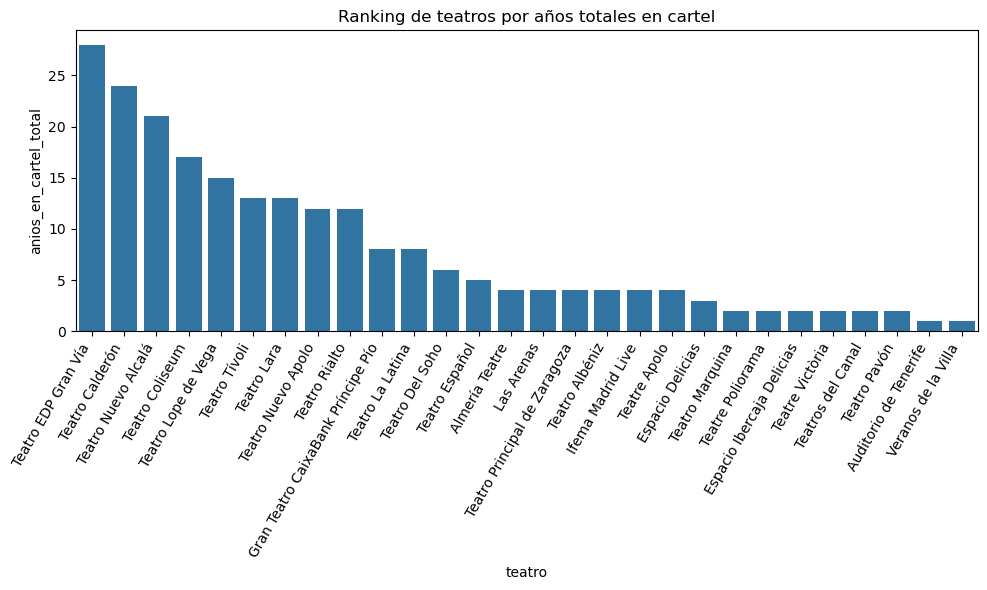

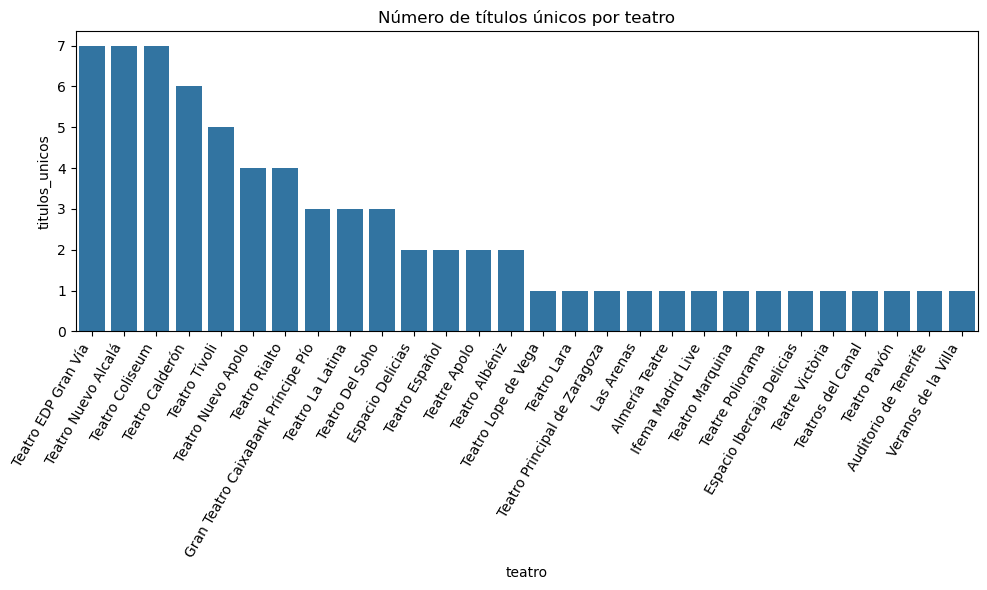

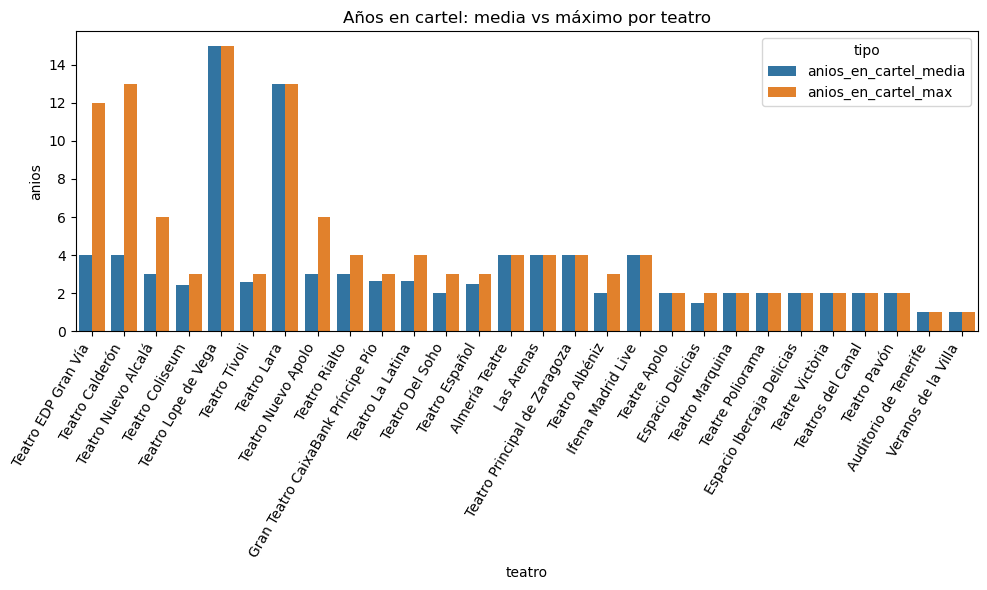

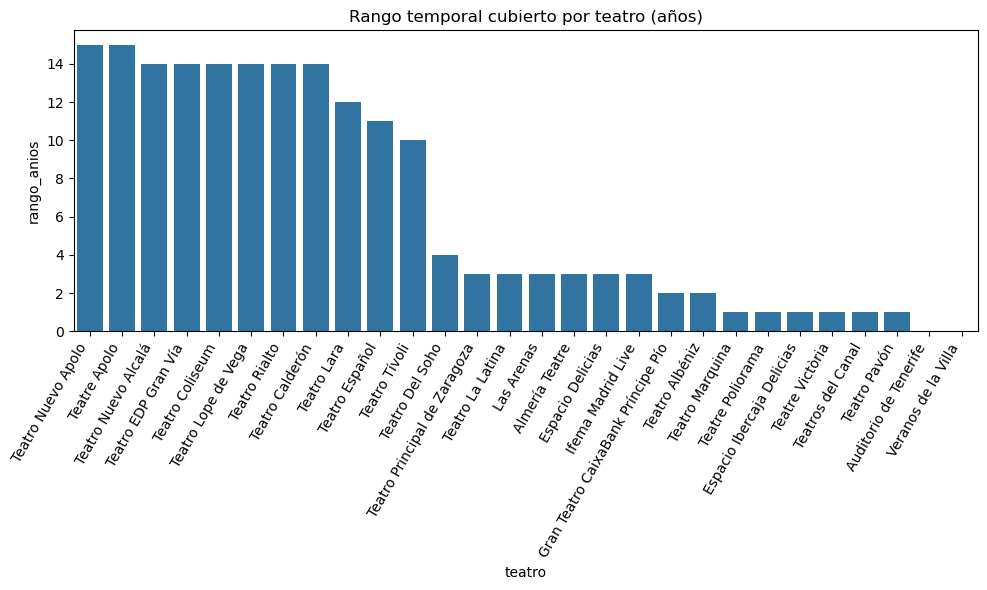

In [2]:
# ============================
# 1. Carga
# ============================

df = pd.read_csv("kpis_teatros_anios_en_cartel.csv")

print(df.head())
print(df.shape)
print(df.columns)

# ============================
# 2. Calidad del dato
# ============================

print("\nValores nulos por columna:")
print(df.isna().sum())

print("\nDuplicados:", df.duplicated().sum())

# ============================
# 3. Estadísticos descriptivos
# ============================

print("\nResumen estadístico:")
print(df.describe())

# ============================
# 4. Ranking de teatros por años en cartel (total)
# ============================

plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values("anios_en_cartel_total", ascending=False),
            x="teatro", y="anios_en_cartel_total")
plt.title("Ranking de teatros por años totales en cartel")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

# ============================
# 5. Ranking por número de títulos únicos
# ============================

plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values("titulos_unicos", ascending=False),
            x="teatro", y="titulos_unicos")
plt.title("Número de títulos únicos por teatro")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

# ============================
# 6. Comparativa media vs máximo de años en cartel
# ============================

df_melt = df.melt(
    id_vars="teatro",
    value_vars=["anios_en_cartel_media", "anios_en_cartel_max"],
    var_name="tipo",
    value_name="anios"
)

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x="teatro", y="anios", hue="tipo")
plt.title("Años en cartel: media vs máximo por teatro")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

# ============================
# 7. Rango temporal cubierto por teatro
# ============================

df["rango_anios"] = df["anio_fin_max"] - df["anio_inicio_min"]

plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values("rango_anios", ascending=False),
            x="teatro", y="rango_anios")
plt.title("Rango temporal cubierto por teatro (años)")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()